# NewsMood


In [2]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [3]:
# Import and Initialize Sentiment Analyzer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

ModuleNotFoundError: No module named 'textblob'

In [4]:
# Twitter API Keys
consumer_key = "6sAWUdmS7Qu6zFs1ttvYeDYUb"
consumer_secret = "ili4RnS6q0CsUnabFypwXyhndUp95RpXYwQdfc0UN8ZG5MIXJQ"
access_token = "907734295648899078-eh0gPAGTItz0DybUPNbNiWFAfUv49l4"
access_token_secret = "EObBdNIJNj7oYsGN7nw92oMVbVgqtlR7JDXcS9xDpnLUw"

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews","CNN","BBCWorld","CBSNews","nytimes"]

In [73]:
# Target Search Term
target_terms = ("@BBC","@CBSNews","@CNN","@FoxNews", "@nytimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times (total of 1000 tweets)
    for x in range(10):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)

    # Store the Average Sentiments
    sentiment = {"User": target,
                 "Date": tweet["created_at"],
                 "Compound": [np.mean(compound_list)],
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}

    # Print the Sentiments
    print(sentiment)
    print("")

{'User': '@BBC', 'Date': 'Thu Sep 21 20:17:49 +0000 2017', 'Compound': [0.10066564417177912], 'Positive': 0.10831288343558283, 'Neutral': 0.072331288343558273, 'Negative': 0.81935582822085895, 'Tweet Count': 326}

{'User': '@CBSNews', 'Date': 'Thu Sep 21 20:35:30 +0000 2017', 'Compound': [0.15570833333333334], 'Positive': 0.15215196078431373, 'Neutral': 0.065343137254901956, 'Negative': 0.78248039215686294, 'Tweet Count': 408}

{'User': '@CNN', 'Date': 'Thu Sep 21 20:42:05 +0000 2017', 'Compound': [-0.10675615212527964], 'Positive': 0.063129753914988804, 'Neutral': 0.10636912751677852, 'Negative': 0.83048545861297529, 'Tweet Count': 447}

{'User': '@FoxNews', 'Date': 'Thu Sep 21 20:42:44 +0000 2017', 'Compound': [0.17724440366972477], 'Positive': 0.14921834862385322, 'Neutral': 0.065856880733944953, 'Negative': 0.78495779816513767, 'Tweet Count': 545}

{'User': '@nytimes', 'Date': 'Thu Sep 21 20:41:33 +0000 2017', 'Compound': [-0.25475196078431367], 'Positive': 0.060036764705882352, 'N

In [74]:
# Convert sentiment to DataFrame
twittersentiment = pd.DataFrame.from_dict(sentiment)
twittersentiment

,Compound,Date,Negative,Neutral,Positive,Tweet Count,User
0,-0.254752,Thu Sep 21 20:41:33 +0000 2017,0.776775,0.163189,0.060037,408,@nytimes


In [68]:
#Export the new CSV
#twittersentiment.to_csv(".csv", index=False)

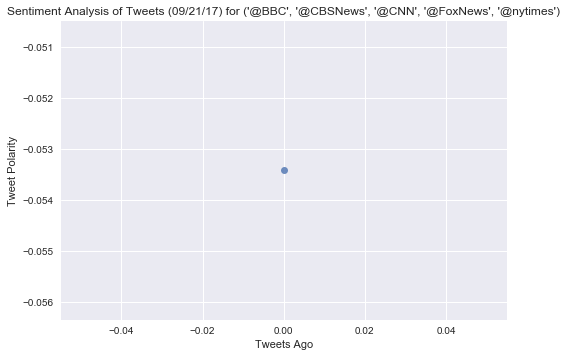

In [40]:
# # Create plot
# plt.plot(np.arange(len(sentiments_pd["Compound"])),
#          sentiments_pd["Compound"], marker="o", linewidth=0.5,
#          alpha=0.8)

# # # Incorporate the other graph properties
# plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_terms))
# plt.ylabel("Tweet Polarity")
# plt.xlabel("Tweets Ago")
# plt.show()

# Overall Sentiment Bar Graph

In [6]:
#Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

#View the polarities
pd.DataFrame(tweet_df_polarity)

NameError: name 'tweet_df' is not defined

In [ ]:
#Store all polarities in a tuple 
tweets_polarity = (tweet_df_polarity["BBC News (World)"],
                        tweet_df_polarity["CBS News"],
                        tweet_df_polarity["CNN"],
                        tweet_df_polarity["Fox News"],
                        tweet_df_polarity["The New York Times"])

#Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="skyblue")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="skyblue")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color="skyblue")
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color="skyblue")

#Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '+%.2f' % float(height)),ha='center', va='bottom'
def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')